<a href="https://colab.research.google.com/github/stanislawWojtas/Uczenie-Maszynowe/blob/main/wyk%C5%82ad3_Regresja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresja

## Regresja liniowa

#### Regresja liniowa, Dane

In [82]:
import numpy as np
X = 2 * np.random.rand(100, 1) # wektor pionowy
y = 4 + 3 * X + np.random.randn(100, 1)

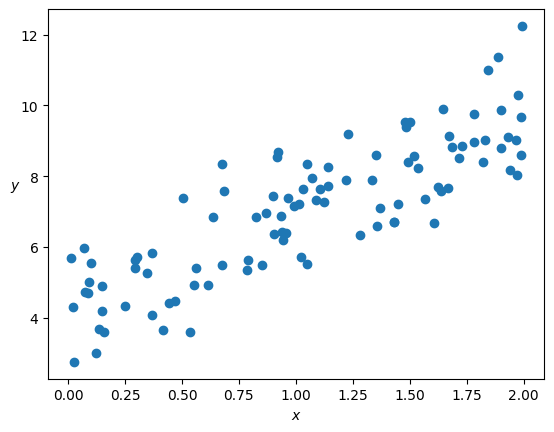

In [83]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)
plt.show()

#### Regresja liniowa, Linear Regression, równania

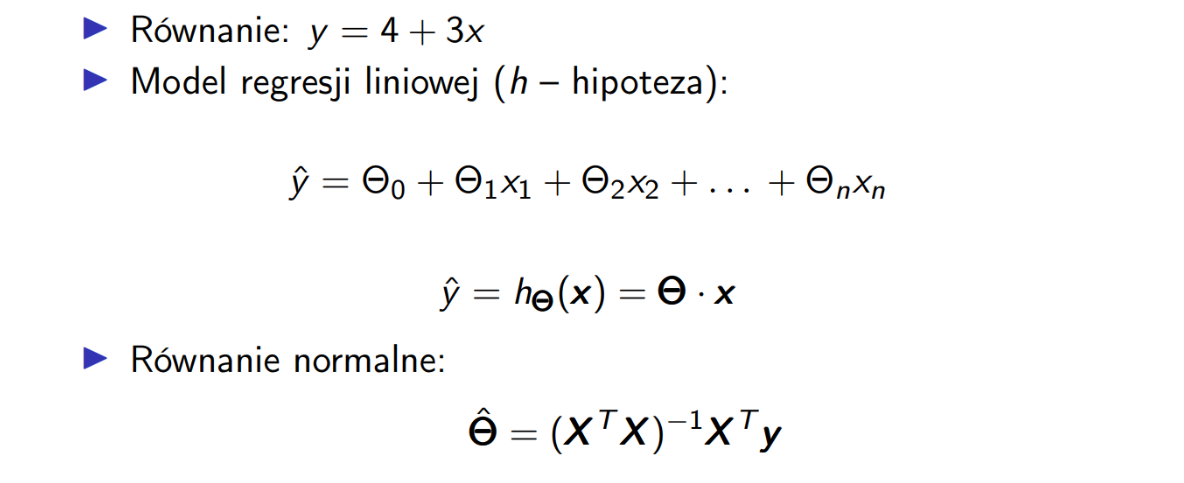

In [84]:
# dokonamy regresji sposobem analitycznym (ręcznie)
X_b = np.c_[np.ones((100, 1)), X]
#powyższe równanie w pythonbie
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)
# mamy nasze najepsze współczynniki wyliczone analitycznie i można je podstawić do równania

[[4.2116322 ]
 [2.71369634]]


#### Regresja liniowa, predykcja: y = 4 + 3x

In [85]:
# predykcja dla nowych elementów 0 i 2
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] #stał komponent d
print(y_predict := X_new_b.dot(theta_best))
# wynik dla 0 to 3,81 a dla 2 to 9,82

[[4.2116322 ]
 [9.63902489]]


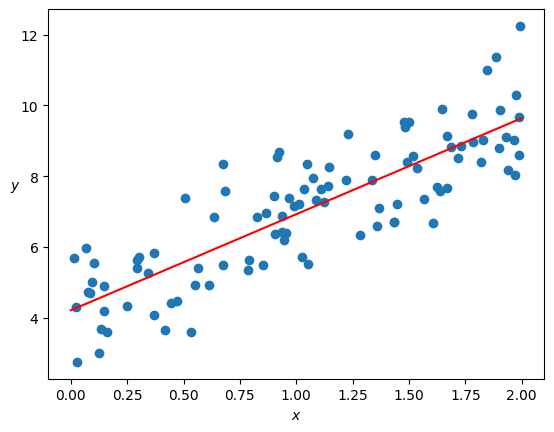

In [86]:
plt.scatter(X, y)
plt.plot(X_new, y_predict, 'red')
plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)
plt.show()

#### Regresja, prościej
Regresje liniową można zrobić za pomocą metody LinearRegression() z biblioteki sklearn.

In [87]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_, "\n", lin_reg.predict(X_new))
# Widzimy takie same wyniki jak w przypadku ręcznego wyliczenia

[4.2116322] [[2.71369634]] 
 [[4.2116322 ]
 [9.63902489]]


## Regresja wielomianowa

#### Regresja wielomianowa, Dane

In [88]:
m = 100
# random.rand daje losowe wyniki a random.randn daje losowe wyniki od 0 do 1 ale z rozkładem gaussowskim
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

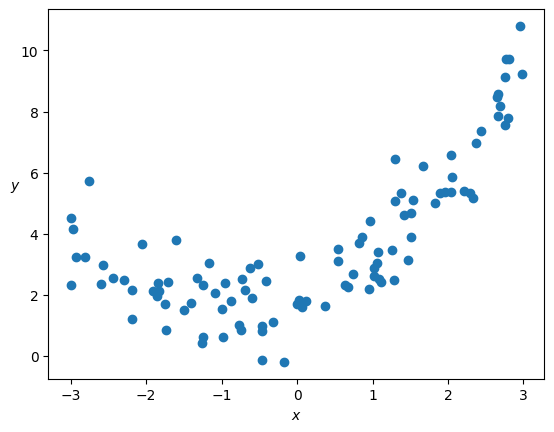

In [89]:
plt.scatter(X, y)
plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)
plt.show()

#### Regresja liniowa, Polynomial Regression
Można wykorzystać regresje linniową do problemów nieliniowych. W naszym przypadku bierzemy $$X^2$$ jako nasz drugi parametr i dodejemy nowy wymiar.

In [90]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0], X_poly[0]) # powinno być (1.73099295)^2 = 2.9963366
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(
    poly_features.fit_transform([[0], [2]])
))
#obliczenie ręczne wartości (powinna być taka sama jak w predict)
print(lin_reg.coef_[0][1] * 2**2 + lin_reg.coef_[0][0] * 2 + lin_reg.intercept_[0])

[-1.74283409] [-1.74283409  3.03747067]
[1.89283157] [[0.90058513 0.53562983]]
[[1.89283157]
 [5.83652116]]
5.836521163399093


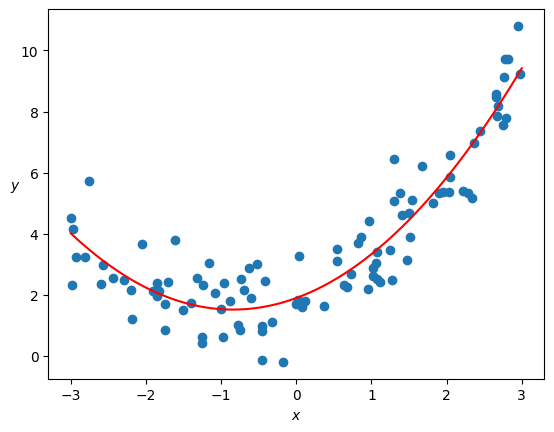

In [91]:
plt.scatter(X, y)
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
plt.plot(X_plot, lin_reg.predict(poly_features.fit_transform(X_plot)), 'red')
plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)
plt.show()

## K-Najbliższych Sąsiadów

In [92]:
import sklearn.neighbors
knn_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3) # trzeba z góry określić liczbe sąsiadów
knn_reg.fit(X, y)
print(knn_reg.predict(X_new))

[[2.26244143]
 [5.75648189]]


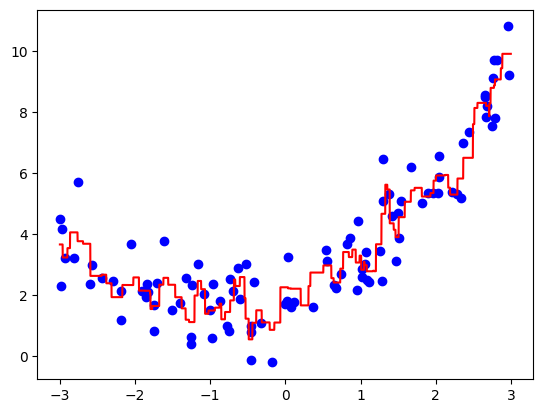

In [93]:
plt.clf()
plt.scatter(X, y, c="blue")
X_new1 = np.arange(-3, 3, 0.001).reshape(-1, 1)
plt.plot(X_new1, knn_reg.predict(X_new1), 'red')
plt.show()

## Metody gradientowe

#### Stochastic Gradient Descent, regresja liniowa

In [94]:
from sklearn.linear_model import SGDRegressor
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
# zmiana wektora pionowego na poziomy (spłaszcza tablice)
print(sgd_reg.intercept_, sgd_reg.coef_)
# 1000 epok (iteracji) lub jeżeli różnica mniejsza niż 0.001 w stosunku do poprzedniej epoki
# learning rate (rozmiar kroku) = 0.1


[3.89075992] [3.11664047]
